In [11]:
import pandas as pd
import json
from pathlib import Path
import csv
import sqlalchemy as sql
from sqlalchemy import create_engine
%matplotlib inline
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [2]:
bnb_price_engine = sql.create_engine("sqlite:///bnb_price_data_df.db")

In [3]:
bnb_tweet_count_engine = sql.create_engine("sqlite:///bnb_tweet_count_df.db")

In [4]:
sql_query1 = """SELECT Timestamp, Value FROM BNB_price_data_df1"""
df1 = pd.read_sql(sql_query1, con=bnb_price_engine)
sql_query2 = """SELECT Timestamp, tweet_count FROM BNB_tweet_count_df1"""
df2 = pd.read_sql(sql_query2, con=bnb_tweet_count_engine)

In [5]:
df2.head()

,Timestamp,tweet_count
0,2021-10-02 23:00:00.000000,829
1,2021-10-03 00:00:00.000000,5932
2,2021-10-03 01:00:00.000000,6084
3,2021-10-03 02:00:00.000000,7327
4,2021-10-03 03:00:00.000000,8929


In [6]:
merged_df = pd.merge(df1, df2, how="left")

In [7]:
merged_df.head()

,Timestamp,Value,tweet_count
0,2021-10-02 15:00:00.000000,435.38,NaN
1,2021-10-02 16:00:00.000000,427.40,NaN
2,2021-10-02 17:00:00.000000,424.15,NaN
3,2021-10-02 18:00:00.000000,425.60,NaN
4,2021-10-02 19:00:00.000000,426.80,NaN


In [8]:
merged_df = merged_df.dropna()

In [9]:
merged_df.head()

,Timestamp,Value,tweet_count
8,2021-10-02 23:00:00.000000,433.16,829.0
9,2021-10-03 00:00:00.000000,429.46,5932.0
10,2021-10-03 01:00:00.000000,428.40,6084.0
11,2021-10-03 02:00:00.000000,425.18,7327.0
12,2021-10-03 03:00:00.000000,425.71,8929.0


No handles with labels found to put in legend.


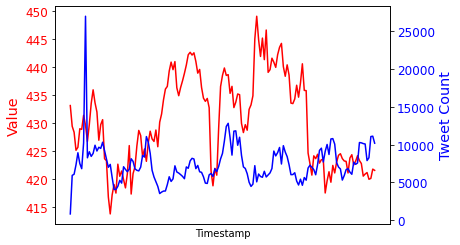

<Figure size 864x432 with 0 Axes>

In [12]:
fig, ax_data = plt.subplots()

fig = plt.figure(figsize=(12,6))

ax_data.set_xlabel("Timestamp")

ax_data.tick_params(axis="x", bottom=False, labelbottom=False)

ax_data.set_ylabel("Value", color="red", size="x-large")

ax_data.tick_params(axis="y", labelcolor="red", labelsize="large")

ax_data.plot(merged_df["Timestamp"], merged_df["Value"], color="red")

ax_tweet_count = ax_data.twinx()
ax_tweet_count.set_ylabel("Tweet Count", color="blue", size="x-large")

ax_tweet_count.tick_params(axis="y", labelcolor="blue", labelsize="large")
ax_tweet_count.plot(merged_df["Timestamp"], merged_df["tweet_count"], color="blue")

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax_data.transAxes)

plt.show()

In [13]:
merged_df.corr()

,Value,tweet_count
Value,1.00000,-0.09014
tweet_count,-0.09014,1.00000


In [14]:
merged_df["tweet_count"].pct_change()

8           NaN
9      6.155609
10     0.025624
11     0.204306
12     0.218643
         ...   
164   -0.217641
165    0.048138
166    0.338772
167    0.004333
168   -0.083416
Name: tweet_count, Length: 161, dtype: float64

In [102]:
merged_df.describe()

,Value,tweet_count
count,163.000000,163.000000
mean,51758.942086,21888.171779
std,2896.508466,6907.328904
min,47309.440000,9134.000000
25%,48932.165000,17007.500000
50%,51559.970000,20521.000000
75%,54555.315000,25319.500000
max,55823.610000,60330.000000
